Writing

$g(x_1,x_2) = (x_1+49)^2 + (x_2-36)^2$

In matrix form

$x^TAx + B^tx + C$

Here,

$x^T = [x_1, x_2]$

$A = [[1,0], [0,1]]$

$B^T = [98, -72]$

$C^T = [2401, 1296]$

For

$f(x_1,x_2) = 256(x_2 - x_1^2)^2 + (2-x_1)^2$

The minimiser and the minimum are

$x_1 = 2, x_2 = 4$
and
$min (f(x_1,x_2)) = 0$

And

For

$g(x_1,x_2) = (x_1+49)^2 + (x_2-36)^2$

The minimiser and the minimum are

$x_1 = -49, x_2 = 36$
and
$min (g(x_1,x_2)) = 0$

We have,

$[grad(g(X))]^T = [2x_1 +98, 2x_2 - 72]$

Now to update our value of x and put it into the function to find a minimimum value for our step length $a$

We want the solution to

$min_ag(X - a[grad(g(X))])$

The functional value itself, after implementing this new input always comes out as

$g(X - a[grad(g(X))]) = (1-2a)^2g(X)$

So on differentiating w.r.t. $a$ and setting the derivative to zero to compute our minima, we get

$a = 0.5$

Hence our step length has become $0.5$

**NOTE: The method proposed above isn't the proper method to find the step length. The actual methond is given by minimising the taylor expansion of** $g(X_K*)$ **where** $K* = k+1$

**According to our analytical solution, the step length is equal to**

$a = S^T S/S^THS$

Where

$S = - grad(g(X_K))$

and

$H$ denotes the hessian

It just so happens that for quadratic equations having coefficient of their variables equal to 1 and each variable has a gradient which is independent of the other, always have an ideal step length equal to 0.5 which gives us our desired output in one iteration

The analytical solution for

However, if we carry out the same thing for $f(x)$

We obtain an expression where a closed form expression cannot exist.

Essentially, every time we end up calculating for a new value of $X_k$

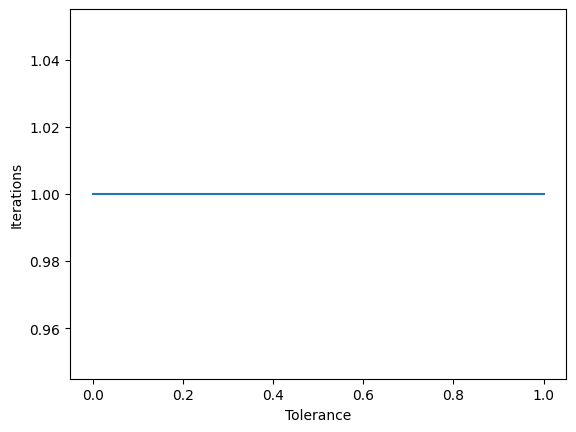


0.0
Minimiser in x =  -49.0
Minimiser in y =  36.0


In [ ]:
#Exercise 1 part 3a Grad Descent with Line Search, Iterations vs Tolerance Plot

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x+49)**2 + (y-36)**2


# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2*x + 98

def df_dy(x, y):
    return 2*y - 72

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y):

    #Establishing a list to print iterations vs tolerance
    I = []
    T = []

    for i in range (10): #had to

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(i)
        count = 0

        #now regarding our function
        #it seems that the value of our step length
        #will be constant regardless of the value of x1 and x2
        #the calculated value for step length is = 0.5
        #and this appears to be the case for every general quadratic function
        #which is only dependent on one variable or in a multi-variate case
        #the gradient of each variable isn't dependent on the other

        step_length_line_search = 0.5

        # Perform the gradient descent iterations

        while (norm > TLevel):
            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            # Update the parameters
            x = x - step_length_line_search * grad_x
            y = y - step_length_line_search * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

        #storing values for iterations and tolerance
        I.append(count)
        T.append(TLevel)

    #plotting iterations vs tolerance
    plt.plot(T,I)
    plt.xlabel('Tolerance')
    plt.ylabel('Iterations')
    plt.show()

    return x, y, f(x, y), history


# Perform gradient descent and plot the results
start_x, start_y = 36, -49
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y)

print()
print(f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)


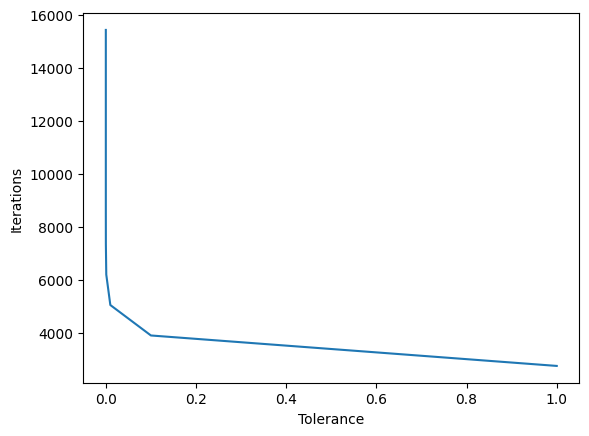


2.4941535147230324e-23
Minimiser in x =  -48.99999999999647
Minimiser in y =  35.99999999999647


In [ ]:
#Exercise 1 part 3b Grad Descent without Line Search, Iterations vs Tolerance Plot

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x+49)**2 + (y-36)**2


# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2*x + 98

def df_dy(x, y):
    return 2*y - 72

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, learning_rate):

    #Establishing a list to print iterations vs tolerance
    I = []
    T = []

    for i in range (12): #modifying because the values were taking to long to obtain

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(i)
        count = 0

        # Perform the gradient descent iterations

        while (norm > TLevel):
            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            # Update the parameters
            x = x - learning_rate * grad_x
            y = y - learning_rate * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

        #storing values for iterations and tolerance
        I.append(count)
        T.append(TLevel)

    #plotting iterations vs tolerance
    plt.plot(T,I)
    plt.xlabel('Tolerance')
    plt.ylabel('Iterations')
    plt.show()

    return x, y, f(x, y), history


#defining the learning rate ourselves
learning_rate = 0.001

# Perform gradient descent and plot the results
start_x, start_y = 36, -49
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate)

print()
print(f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)



0.0
Minimiser in x =  -49.0
Minimiser in y =  36.0
Total iterations =  1


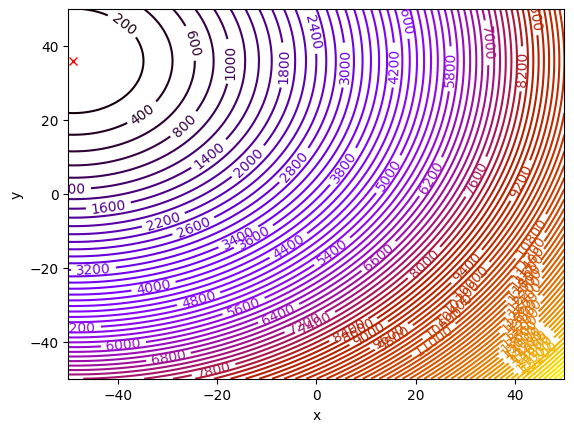

In [ ]:
#Exercise 1 part 3c, implementing Grad Descent with Line Search Plot

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x+49)**2 + (y-36)**2


# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2*x + 98

def df_dy(x, y):
    return 2*y - 72

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, p):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(p)
        count = 0

        #now regarding our function
        #it seems that the value of our step length
        #will be constant regardless of the value of x1 and x2
        #the calculated value for step length is = 0.5
        #and this appears to be the case for every general quadratic function
        #which is only dependent on one variable or in a multi-variate case
        #the gradient of each variable isn't dependent on the other

        step_length_line_search = 0.5

        # Perform the gradient descent iterations

        while (norm > TLevel):

            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            # Update the parameters
            x = x - step_length_line_search * grad_x
            y = y - step_length_line_search * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            # Plotting the points on the plot
            plt.plot(x, y, "rx-", ms=5.5)

        return x, y, f(x, y), history, count


# Plotting the level sets using a contour map
x = np.linspace(-50, 50, 100)
y = np.linspace(-50, 50, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = f(x[i], y[j])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')


# Perform gradient descent and plot the results
start_x, start_y = 36, -49

#defining a tolerance for plotting
toler = 0.000000000001

x_opt, y_opt, f_opt, history, count = gradient_descent(start_x, start_y, toler)

print()
print(f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)
print("Total iterations = ", count)






0.24944397542330451
Minimiser in x =  -48.646839997010346
Minimiser in y =  35.646839997010346
Total iterations =  2739


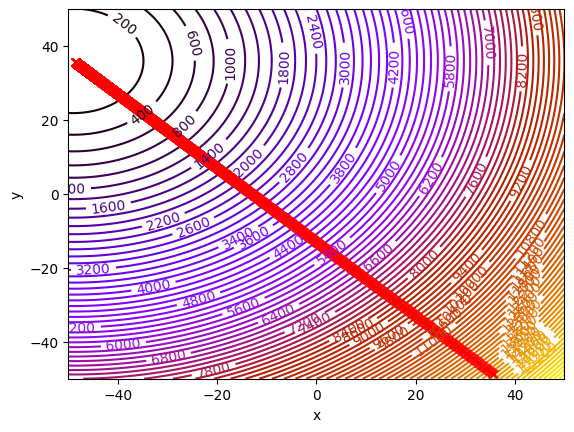

In [ ]:
#Exercise 1 part 3d, implementing Grad Descent with pre-defined learning rate

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x+49)**2 + (y-36)**2


# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2*x + 98

def df_dy(x, y):
    return 2*y - 72

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, p, learning_rate):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(p)
        count = 0

        # Perform the gradient descent iterations

        while (norm > TLevel):

            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            # Update the parameters
            x = x - learning_rate * grad_x
            y = y - learning_rate * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            # Plotting the points on the plot
            plt.plot(x, y, "rx-", ms=5.5)

        return x, y, f(x, y), history, count


# Plotting the level sets using a contour map
x = np.linspace(-50, 50, 100)
y = np.linspace(-50, 50, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = f(x[i], y[j])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')


# Perform gradient descent and plot the results
start_x, start_y = 36, -49

#defining a tolerance for plotting
toler = 0.000000000001

#defining a learning rate ourselves
learning_rate = 0.001

x_opt, y_opt, f_opt, history, count = gradient_descent(start_x, start_y, toler, learning_rate)

print()
print(f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)
print("Total iterations = ", count)





Some of the shortcomings of this algorithm can be that:



*   To obtain step length by minimisation may take a long time and too many iterations that are obviously very costly
*   It may be the case that a function in terms of the step length, may have multiple minimas, so we'd have to find the global minima in that case if it even exists (a non-convex function can cause issues)


*   Line search requires multiple functional evaluations
*   Without proper conditioning, the step length can be way too large or way too small



